<a href="https://colab.research.google.com/github/AlexM208/501AZ_FsecurePhpServerCode/blob/main/Confidence_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Point Estimate (Mean Sepal Length): 5.84
95% Confidence Interval for Mean Sepal Length: (5.709732481507366, 5.976934185159301)
95% Confidence Interval for Proportion of Long Sepals: (0.3868294816129595, 0.5465038517203739)
Required Sample Size for 95% Confidence Level: 383.0
95% Confidence Interval for Small Sample (n=20): (5.639952673692211, 6.310047326307788)
95% Bootstrap Percentile Confidence Interval for Mean Sepal Length: [5.70933333 5.97866667]


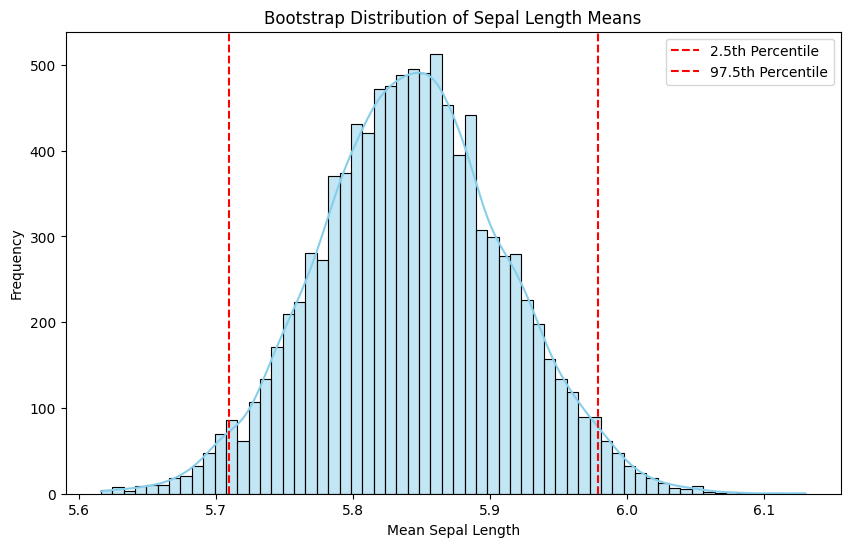

In [1]:
# Part 1: Import Libraries and Load the Iris Dataset
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = sns.load_dataset('iris')

# Part 2: Point Estimate
point_estimate = iris['sepal_length'].mean()
print(f"Point Estimate (Mean Sepal Length): {point_estimate:.2f}")

# Part 3: Confidence Intervals, Margin of Error, and Standard Error
sample_std = iris['sepal_length'].std(ddof=1)
sample_size = len(iris['sepal_length'])
standard_error = sample_std / np.sqrt(sample_size)
t_critical = stats.t.ppf(0.975, df=sample_size-1)
margin_error = t_critical * standard_error
confidence_interval = (point_estimate - margin_error, point_estimate + margin_error)
print(f"95% Confidence Interval for Mean Sepal Length: {confidence_interval}")

# Part 4: Confidence Interval for Population Proportion
mean_sepal_length = iris['sepal_length'].mean()
iris['is_long'] = iris['sepal_length'] > mean_sepal_length
p_hat = iris['is_long'].mean()
se_p = np.sqrt(p_hat * (1 - p_hat) / sample_size)
confidence_interval_p = stats.norm.interval(0.95, loc=p_hat, scale=se_p)
print(f"95% Confidence Interval for Proportion of Long Sepals: {confidence_interval_p}")

# Part 5: Sample Size Determination
z_score = stats.norm.ppf(0.975)
margin_of_error = 0.05
required_sample_size = (z_score**2 * p_hat * (1 - p_hat)) / margin_of_error**2
required_sample_size = np.ceil(required_sample_size)
print(f"Required Sample Size for 95% Confidence Level: {required_sample_size}")

# Part 6: Confidence Interval for Population Mean (Small Sample Size)
small_sample = iris['sepal_length'].sample(20, random_state=42)
small_sample_mean = small_sample.mean()
small_sample_std = small_sample.std(ddof=1)
small_se = small_sample_std / np.sqrt(len(small_sample))
t_critical_small = stats.t.ppf(0.975, df=len(small_sample)-1)
margin_error_small = t_critical_small * small_se
confidence_interval_small = (small_sample_mean - margin_error_small, small_sample_mean + margin_error_small)
print(f"95% Confidence Interval for Small Sample (n=20): {confidence_interval_small}")

# Part 7: Bootstrap Percentile Method
bootstrap_samples = np.random.choice(iris['sepal_length'], size=(10000, sample_size), replace=True)
bootstrap_means = np.mean(bootstrap_samples, axis=1)
percentile_confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% Bootstrap Percentile Confidence Interval for Mean Sepal Length: {percentile_confidence_interval}")

# Optional Visualization
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, kde=True, color='skyblue')
plt.axvline(percentile_confidence_interval[0], color='red', linestyle='--', label='2.5th Percentile')
plt.axvline(percentile_confidence_interval[1], color='red', linestyle='--', label='97.5th Percentile')
plt.title('Bootstrap Distribution of Sepal Length Means')
plt.xlabel('Mean Sepal Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()
